# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**team 3**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [85]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

#Libraries for Data visualization
import matplotlib.pyplot as plt

# Libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2




<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
test_df = pd.read_csv('df_test.csv')
train_df = pd.read_csv('df_train.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [6]:
# look at data statistics
train_df.head(5)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [15]:
train_df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [35]:
#Checking for outliers in the different columns
train_df.kurtosis()

C:\Users\f5471397\AppData\Local\Temp/ipykernel_20080/2857217877.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          3.534245
Seville_temp_max          -0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Barcelona_pressure'>

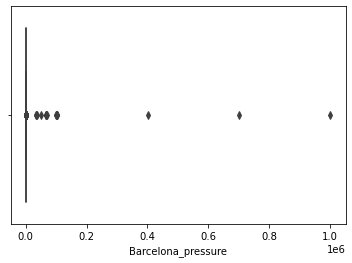

In [36]:
sns.boxplot(train_df['Barcelona_pressure'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Valencia_snow_3h'>

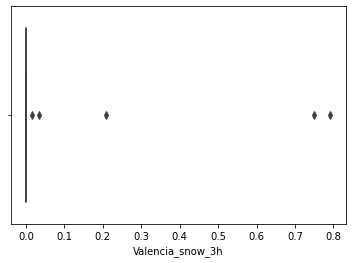

In [37]:
sns.boxplot(train_df['Valencia_snow_3h'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Seville_rain_3h'>

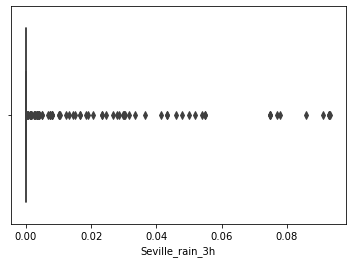

In [38]:
sns.boxplot(train_df['Seville_rain_3h'])

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

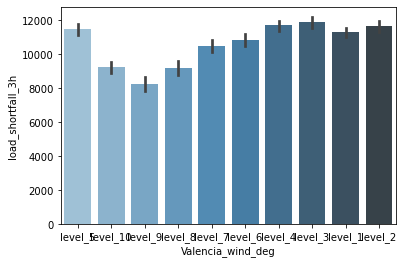

In [22]:
# plot relevant feature interactions
sns.barplot(x="Valencia_wind_deg",
y="load_shortfall_3h",
data=train_df,
palette="Blues_d")

<AxesSubplot:xlabel='Seville_pressure', ylabel='load_shortfall_3h'>

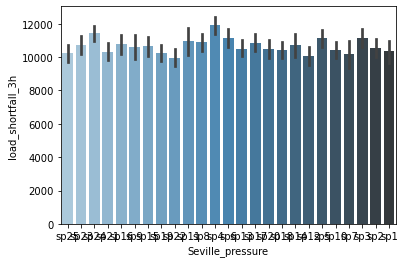

In [20]:
sns.barplot(x="Seville_pressure",
y="load_shortfall_3h",
data=train_df,
palette="Blues_d")

<AxesSubplot:>

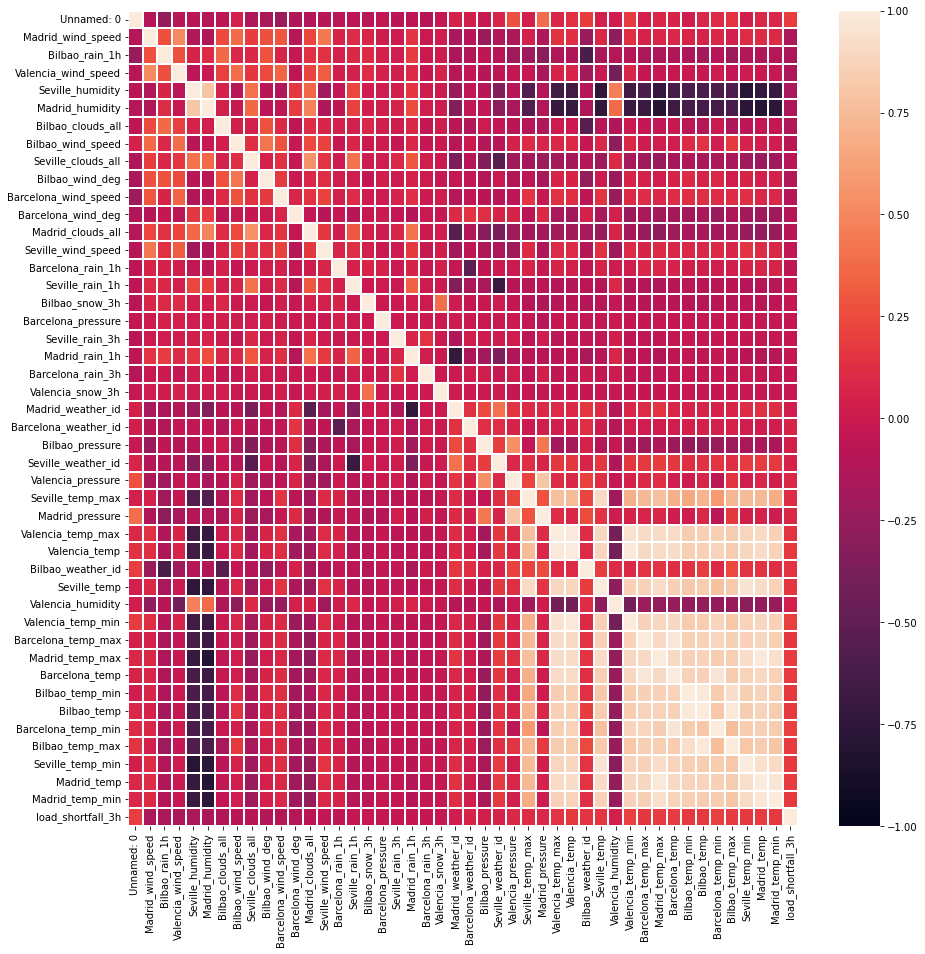

In [24]:
# evaluate correlation
fig, ax = plt.subplots(figsize=(15, 15))

#create heatmap
sns.heatmap(train_df.corr(),vmin=-1,vmax=1, linewidths=.3)

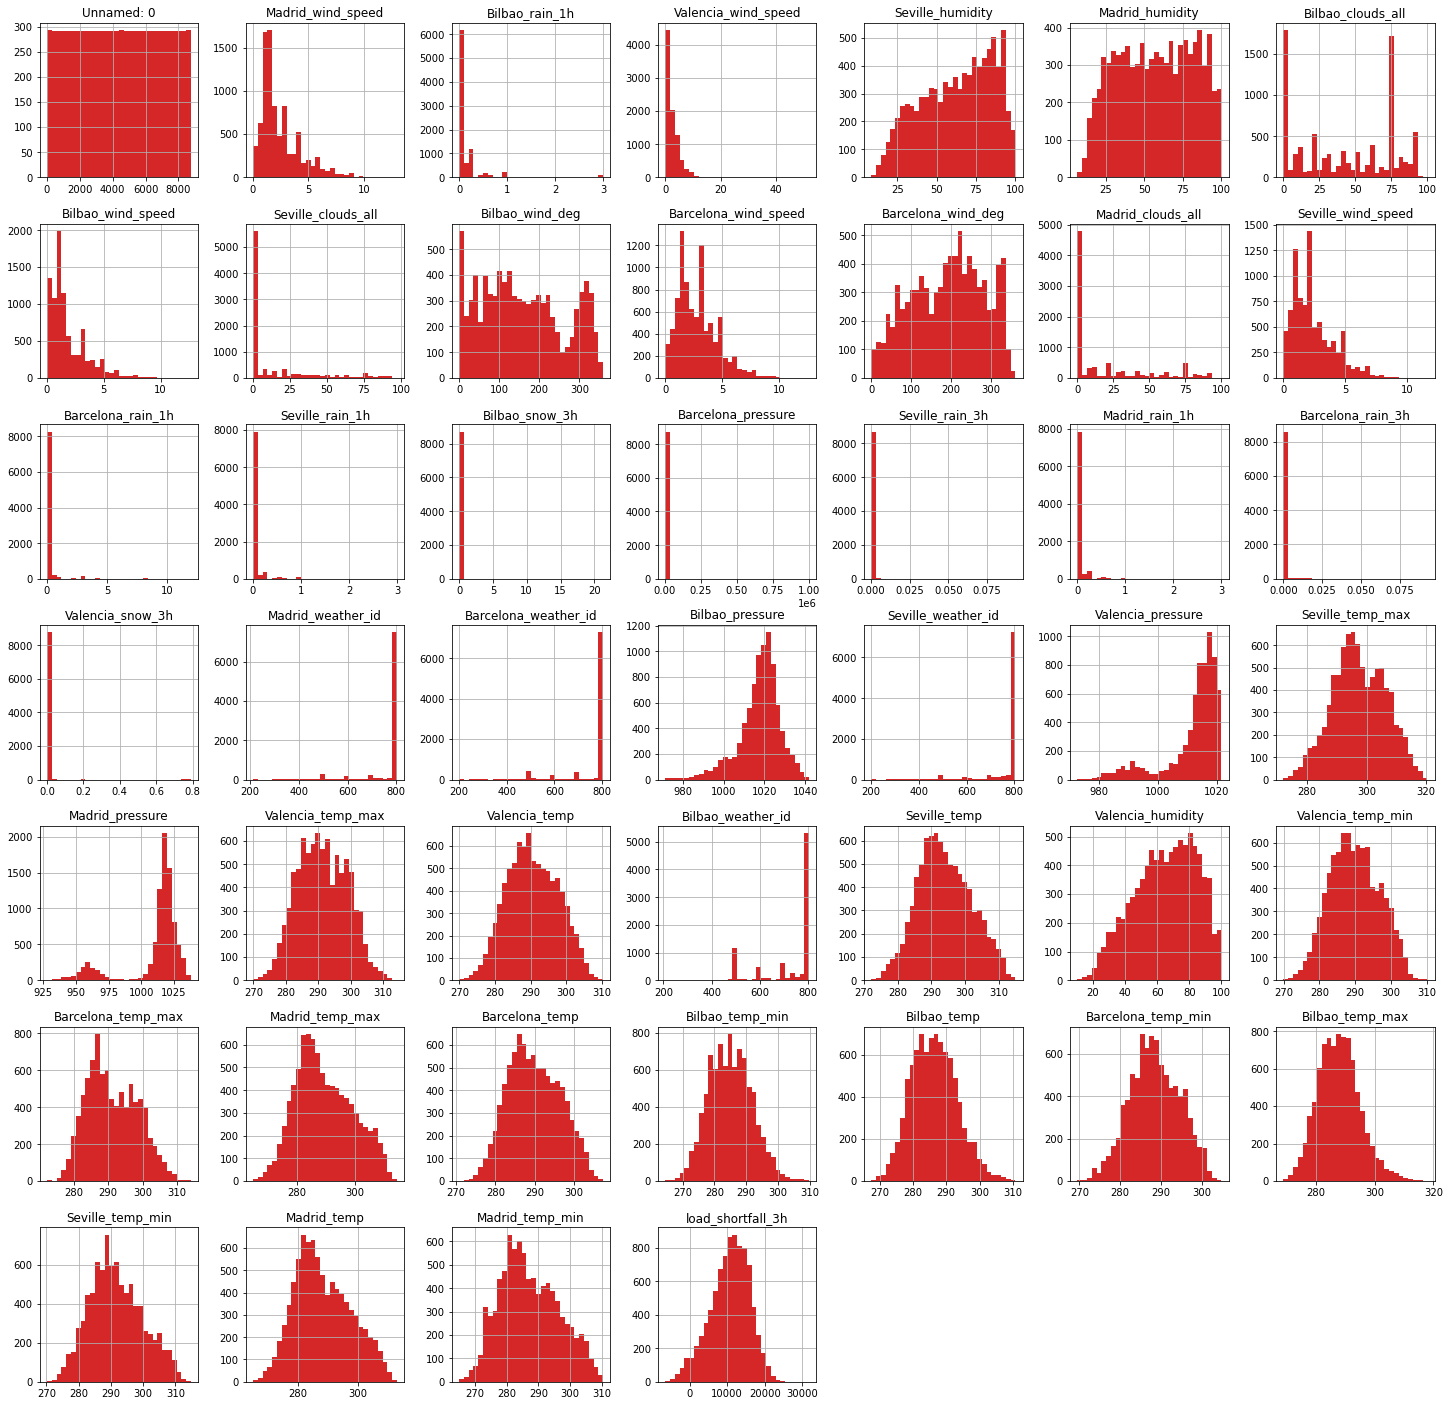

In [26]:
# have a look at feature distributions
train_df.hist(bins=30, figsize=(25,25), color = 'tab:Red')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [34]:
# remove missing values/ features


In [32]:
# create new features
train_df['year'] = pd.DatetimeIndex(train_df['time']).year
test_df['year'] = pd.DatetimeIndex(test_df['time']).year
train_df['time'] = pd.to_datetime(train_df['time'], format='%Y-%m-%d %H:%M:%S')
test_df['time'] = pd.to_datetime(test_df['time'], format='%Y-%m-%d %H:%M:%S')
train_df['hour'] = pd.DatetimeIndex(train_df['time']).hour
test_df['hour'] = pd.DatetimeIndex(test_df['time']).hour
train_df['month'] = pd.DatetimeIndex(train_df['time']).month
test_df['month'] = pd.DatetimeIndex(test_df['time']).month
train_df['day'] = pd.DatetimeIndex(train_df['time']).day
test_df['day'] = pd.DatetimeIndex(test_df['time']).day

#test and train new features
for label, row in train_df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']

        
#For train set
for label, row in train_df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']
        
        train_df.loc[label, 'Valencia_pressure'] = round((train_df[(train_df['year'] == y) & (train_df['month'] == m)]['Valencia_pressure']).mean(),1) 


#For test set
for label, row in test_df.iterrows():
    if pd.isnull(row['Valencia_pressure']):
        y = row['year']
        m = row['month']
        d = row['day']
        h = row['hour']
        
        test_df.loc[label, 'Valencia_pressure'] = round((test_df[(test_df['year'] == y) & (test_df['month'] == m)]['Valencia_pressure']).mean(),1)

In [53]:
# engineer existing features
train_df['Year']  = train_df['time'].astype('datetime64').dt.year
train_df['Month_of_year']  = train_df['time'].astype('datetime64').dt.month
train_df['Week_of_year'] = train_df['time'].astype('datetime64').dt.weekofyear
train_df['Day_of_year']  = train_df['time'].astype('datetime64').dt.dayofyear
train_df['Day_of_month']  = train_df['time'].astype('datetime64').dt.day
train_df['Day_of_week'] = train_df['time'].astype('datetime64').dt.dayofweek
train_df['Hour_of_week'] = ((train_df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - train_df['time'].astype('datetime64').dt.hour)
train_df['Hour_of_day']  = train_df['time'].astype('datetime64').dt.hour


C:\Users\f5471397\AppData\Local\Temp/ipykernel_20080/424788698.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_df['Week_of_year'] = train_df['time'].astype('datetime64').dt.weekofyear


<AxesSubplot:>

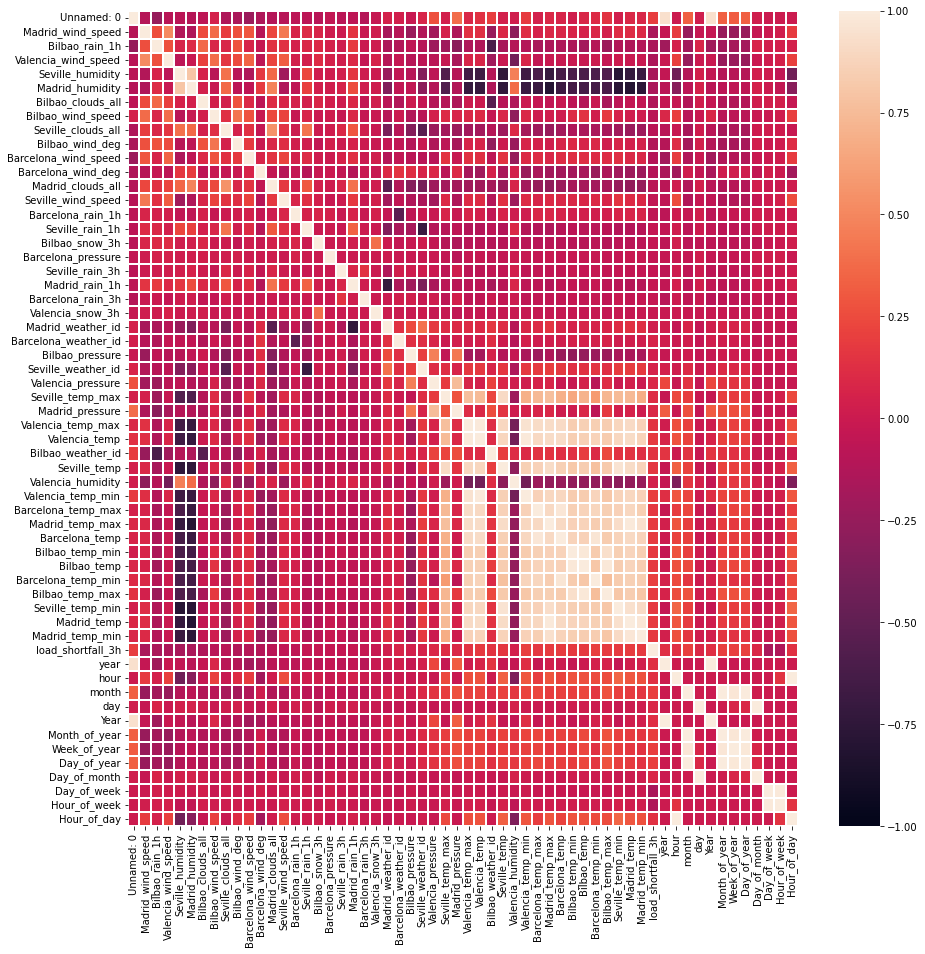

In [40]:
#checking the correlation
fig, ax = plt.subplots(figsize=(15, 15))

#creating heatmap
sns.heatmap(train_df.corr(),vmin=-1,vmax=1, linewidths=.3)

<AxesSubplot:>

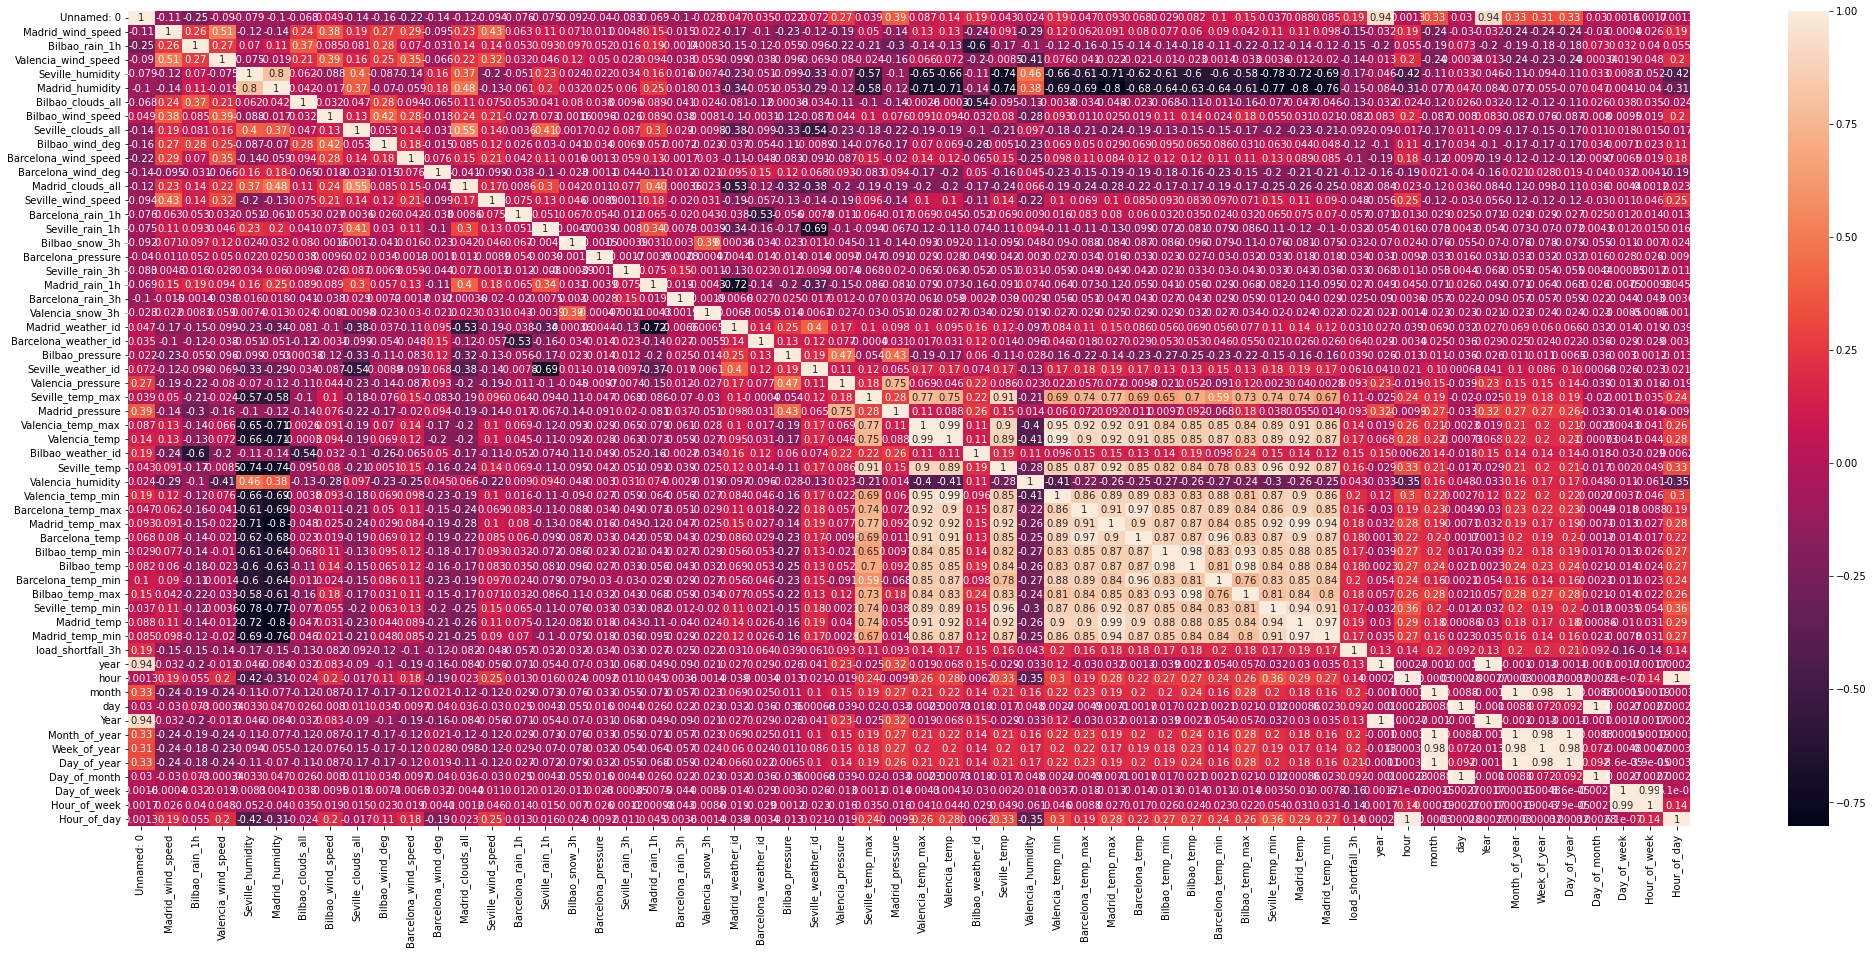

In [87]:
plt.figure(figsize=[35,15])
sns.heatmap(train_df.corr(),annot=True )

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [92]:
# split data
y = train_df['load_shortfall_3h']
X = train_df.drop('load_shortfall_3h', axis=1)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [100]:
print('Training prediction:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing prediction:', X_test.shape)
print('Testing target:', y_test.shape)

Training prediction: (7010, 60)
Training target: (7010,)
Testing prediction: (1753, 60)
Testing target: (1753,)


In [110]:
y_train = train_df[['load_shortfall_3h']]
X_train = train_df[['Madrid_wind_speed','Bilbao_rain_1h','Valencia_wind_speed']]

# Fit model
lm_regression = LinearRegression(normalize=True)
print ("Training Model...")
lm_regression.fit(X_train, y_train)

# Pickle model for use within our API
save_path = 'C:/Users/f5471397/load-shortfall-regression-predict-api/assets/trained-models/models.pkl'
print (f"Training completed. Saving model to: {save_path}")
pickle.dump(lm_regression, open(save_path,'wb'))

Training Model...
Training completed. Saving model to: C:/Users/f5471397/load-shortfall-regression-predict-api/assets/trained-models/models.pkl


In [103]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic